In [ ]:
from sklearn.feature_selection import chi2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df2=df = pd.read_csv('Datos.csv',sep=";")
for i in range(len(df.index)):
    df2.loc[i] = np.where(df.loc[i] <= 0.001, "<", df.loc[i])
    df2.loc[i] = np.where(df.loc[i] != '<', "", df.loc[i])
df2

# Load Dataset
df = pd.read_csv('Datos.csv',sep=";")
df = df.rename(index={0: 'B. asper Venom\n(0/4 live)',1: 'Mix + Venom\n(3/4 live)',2: 'CP471474 + Venom\n(1/4 live)',3: 'Varespladib + Venom\n(4/4 live)',4: 'Negative Saline\n(4/4 live)',5: 'Negative Mix Control\n(4/4 live)'})

fig = plt.figure(figsize=(7,6))
plt.rcParams.update({'font.size': 13.5})
sns.heatmap(df, annot=df, cmap='Blues',fmt='')
plt.title('Chi-Square Test Results Preincubation B. asper')
plt.savefig('Chi-Square Test Results Preincubation B asper.png', dpi=600,bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cargar los datos
file_path = 'datos.xlsx'  # Asegúrate de ajustar esto a la ubicación correcta de tu archivo
data = pd.read_excel(file_path)

# Mapeo de los nombres de los grupos según tu especificación
group_names = {
    'Data 1': 'C. d. cumanensis Venom',
    'Data 2': 'CP471474 + Venom',
    'Data 3': 'Mix + Venom',
    'Data 4': 'Varespladib + Venom',
    'Data 5': 'Negative control'
}

# Actualizar los nombres de los grupos en el DataFrame
data['Group'] = data['Group'].map(group_names)

# Realizar la prueba de Tukey
tukey_result = pairwise_tukeyhsd(endog=data['Data'], groups=data['Group'], alpha=0.05)

# Convertir el resultado de Tukey a un DataFrame y ajustar los nombres de los grupos
tukey_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Orden específico de los grupos para los gráficos
group_order_p = [
    'Negative control',
    'Varespladib + Venom',
    'Mix + Venom',    
    'CP471474 + Venom',
    'C. d. cumanensis Venom' 
]

group_order_bar = [
    'C. d. cumanensis Venom',
    'CP471474 + Venom',
    'Mix + Venom',
    'Varespladib + Venom',
    'Negative control'
]

# Filtrar el DataFrame de Tukey para los grupos especificados y en el orden deseado
tukey_df_filtered = tukey_df[(tukey_df['group1'].isin(group_order_p)) & (tukey_df['group2'].isin(group_order_p))]

# Crear y rellenar la matriz de valores de p
p_value_matrix_ordered = pd.DataFrame(np.nan, index=group_order_p, columns=group_order_p)
for _, row in tukey_df_filtered.iterrows():
    p_value_matrix_ordered.loc[row['group1'], row['group2']] = row['p-adj']
    p_value_matrix_ordered.loc[row['group2'], row['group1']] = row['p-adj']

# Calcular las medias y los errores estándar para cada grupo
grouped_data = data.groupby('Group')
means = grouped_data['Data'].mean()
std_errors = grouped_data['Data'].sem()

# Extraer las medias y los errores estándar en el orden específico
data_ordered = [means.loc[name] for name in group_order_bar]
std_error_ordered = [std_errors.loc[name] for name in group_order_bar]

# Configuración de la visualización
plt.figure(figsize=(16, 7))
plt.rcParams.update({'font.size': 15})

# Gráfico de calor para los resultados de la prueba de Tukey
plt.subplot(1, 2, 1)
sns.heatmap(p_value_matrix_ordered, annot=True, cmap='Blues', fmt='')
plt.title('Tukey Test Results')

# Gráfico de barras para la actividad miotóxica
plt.subplot(1, 2, 2)
plt.barh(np.arange(len(group_order_bar)), data_ordered, xerr=std_error_ordered, align='center', capsize=4)
plt.yticks(np.arange(len(group_order_bar)), group_order_bar)
plt.xlabel('\n CK activity (U/l)')

# Guardar y mostrar los gráficos
plt.tight_layout()
plt.savefig('Tukey Test Results Miotoxic Activity C d cumanensis.png', dpi=600)
plt.show()


In [144]:
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Generando variables cuantitativas
n = 1000  # Asumiendo que n es el número de observaciones
edad = np.random.randint(5, 80, size=n)
peso = np.random.randint(20, 120, size=n)
dosis_antiveneno = np.random.uniform(5, 30, size=n).round(2)
tiempo_hasta_tratamiento = np.random.uniform(0.5, 6, size=n).round(2)
recuperacion = np.random.randint(1, 15, size=n)

# Generando variables cualitativas
tipo_serpiente = np.random.choice(['Venenosa', 'No venenosa'], size=n)
sintomas_severos = np.random.choice(['Sí', 'No'], size=n)

# Inicializando la variable efectividad_antiveneno como vacía
efectividad_antiveneno = np.array([None] * n)

# Definiendo función para calcular la efectividad del antiveneno
def calcular_efectividad(dosis, tiempo, es_venenosa):
    if es_venenosa == 'No venenosa':
        return 'No efectivo'  # No aplica si la serpiente no es venenosa
    else:
        # Considerando dosis alta y tratamiento rápido para ser efectivo
        if dosis > 20 and tiempo < 2:
            return 'Efectivo'
        else:
            return 'No efectivo'

# Calculando la efectividad del antiveneno
for i in range(n):
    efectividad_antiveneno[i] = calcular_efectividad(dosis_antiveneno[i], tiempo_hasta_tratamiento[i], tipo_serpiente[i])

# Variables cuantitativas con correlaciones inducidas
nivel_toxina = dosis_antiveneno * 1.5 + np.random.normal(0, 5, size=n)
presion_arterial = edad * 1.2 + np.random.normal(0, 10, size=n)
frecuencia_cardiaca = 70 + np.random.normal(0, 15, size=n)

# Nuevas variables cualitativas
region_geografica = np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], size=n)
tipo_atencion = np.random.choice(['Hospital', 'Clínica', 'Atención en el sitio'], size=n)

# Crear DataFrame
data_extended = pd.DataFrame({
    'Edad': edad,
    'Peso': peso,
    'Dosis_Antiveneno': dosis_antiveneno,
    'Tiempo_Hasta_Tratamiento': tiempo_hasta_tratamiento,
    'Recuperacion': recuperacion,
    'Nivel_Toxina': nivel_toxina,
    'Presion_Arterial': presion_arterial,
    'Frecuencia_Cardiaca': frecuencia_cardiaca,
    'Tipo_Serpiente': tipo_serpiente,
    'Sintomas_Severos': sintomas_severos,
    'Efectividad_Antiveneno': efectividad_antiveneno,
    'Region_Geografica': region_geografica,
    'Tipo_Atencion': tipo_atencion
})

# Codificar variables cualitativas y preparar datos para PCA
data_extended_encoded = pd.get_dummies(data_extended, columns=['Tipo_Serpiente', 'Sintomas_Severos', 'Efectividad_Antiveneno', 'Region_Geografica', 'Tipo_Atencion'])

# Estandarizar las variables cuantitativas
from sklearn.preprocessing import StandardScaler
scaler_extended = StandardScaler()
data_extended_scaled = scaler_extended.fit_transform(data_extended_encoded.select_dtypes(include=np.number))


# Gráfico de Barras

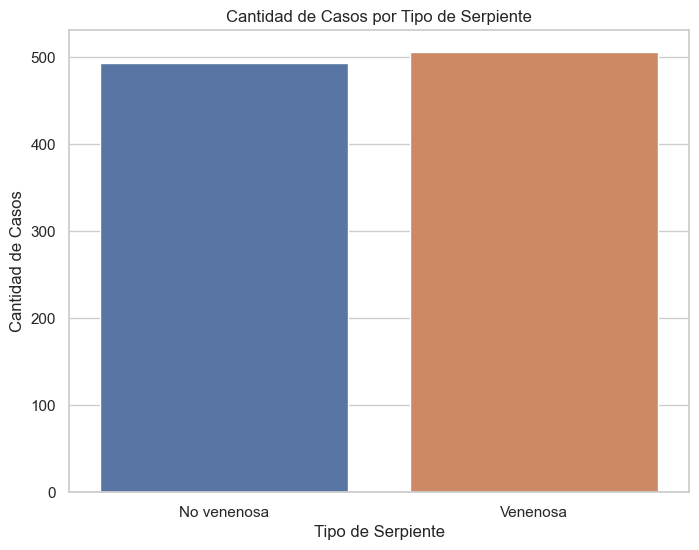

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establece el estilo visual de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=data_extended, x='Tipo_Serpiente')
plt.title('Cantidad de Casos por Tipo de Serpiente')
plt.xlabel('Tipo de Serpiente')
plt.ylabel('Cantidad de Casos')
plt.show()


# Gráfico Circular (Pastel)

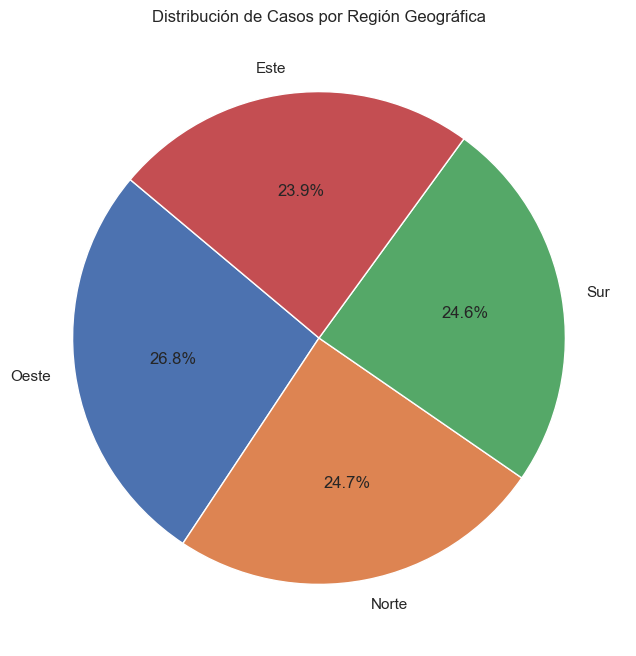

In [146]:
plt.figure(figsize=(8, 8))
data_extended['Region_Geografica'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Casos por Región Geográfica')
plt.ylabel('')  # Eliminar la etiqueta del eje Y para un gráfico de pastel
plt.show()


# Gráfico de dispersión

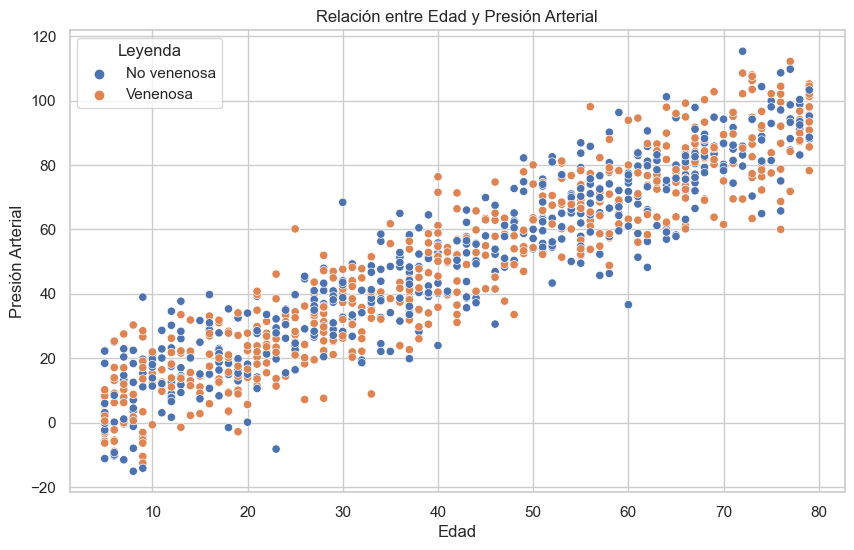

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_extended, x='Edad', y='Presion_Arterial', hue='Tipo_Serpiente')
plt.title('Relación entre Edad y Presión Arterial')
plt.xlabel('Edad')
plt.ylabel('Presión Arterial')
plt.legend(title='Leyenda')
plt.show()


# Boxplot

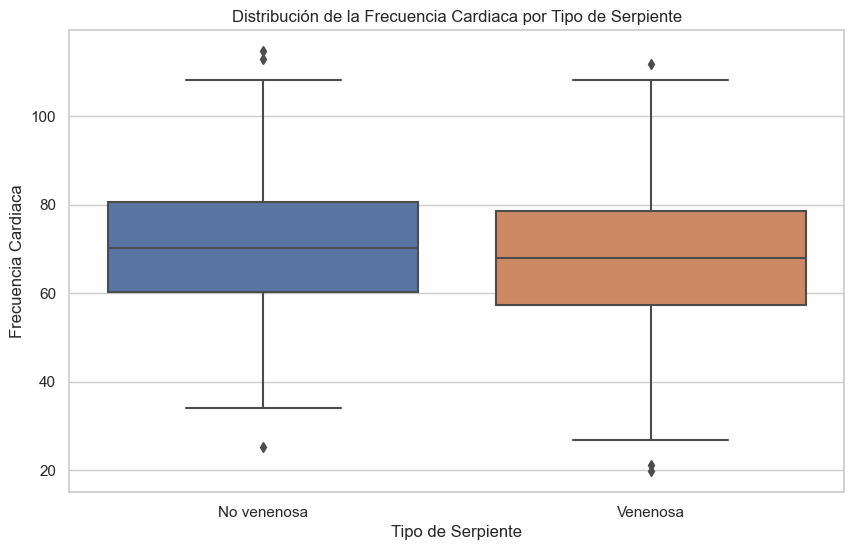

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_extended, x='Tipo_Serpiente', y='Frecuencia_Cardiaca')
plt.title('Distribución de la Frecuencia Cardiaca por Tipo de Serpiente')
plt.xlabel('Tipo de Serpiente')
plt.ylabel('Frecuencia Cardiaca')
plt.show()


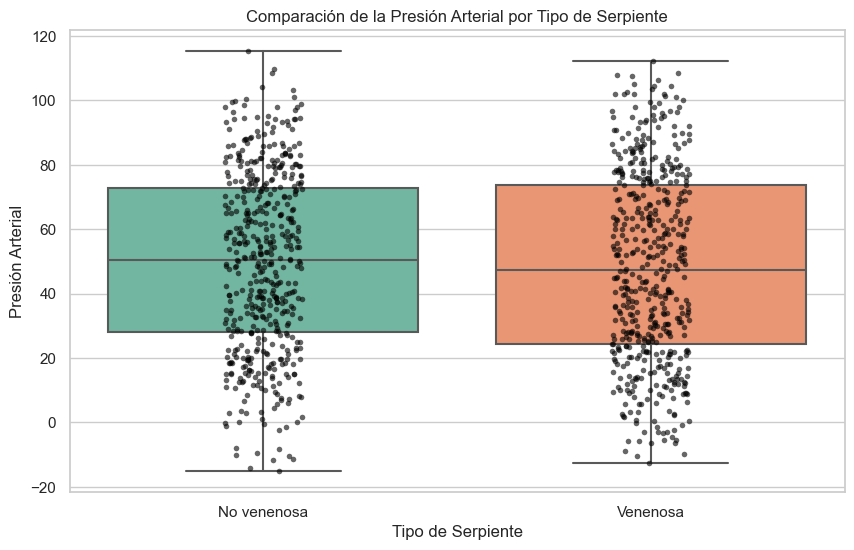

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establece el estilo visual de los gráficos
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Dibujar un boxplot para mostrar la distribución de la Presion_Arterial por Tipo_Serpiente
sns.boxplot(data=data_extended, x='Tipo_Serpiente', y='Presion_Arterial', palette="Set2")

# Añadir los puntos de datos individuales para mostrar todas las observaciones (usando stripplot)
sns.stripplot(data=data_extended, x='Tipo_Serpiente', y='Presion_Arterial', color='black', size=4, jitter=True, alpha=0.6)

plt.title('Comparación de la Presión Arterial por Tipo de Serpiente')
plt.xlabel('Tipo de Serpiente')
plt.ylabel('Presión Arterial')
plt.show()


# Gráficos de Violín

Text(0.5, 1.0, 'Distribución de la Presión Arterial por Tipo de Serpiente')

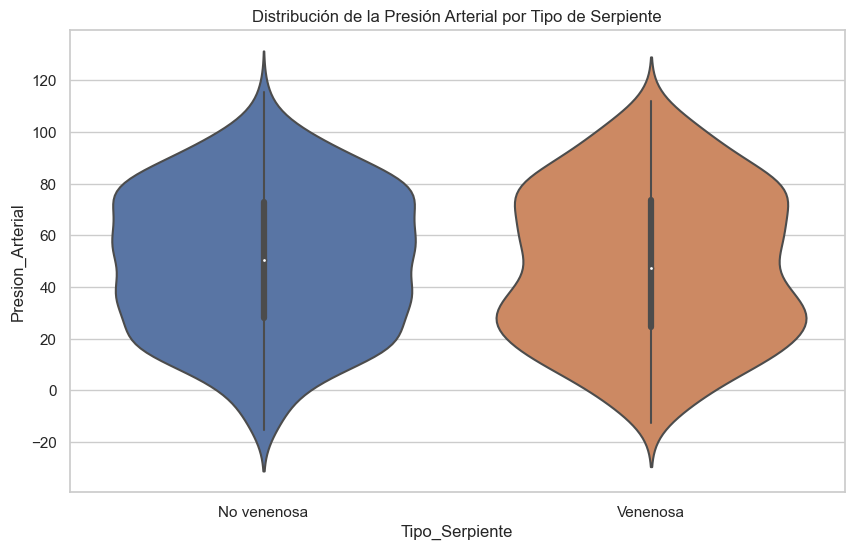

In [150]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_extended, x='Tipo_Serpiente', y='Presion_Arterial')
plt.title('Distribución de la Presión Arterial por Tipo de Serpiente')


# Histograma

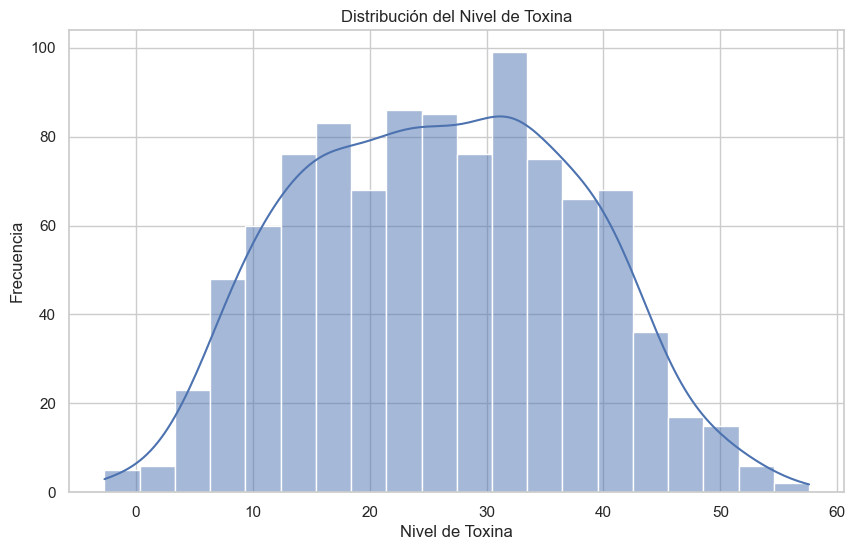

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_extended, x='Nivel_Toxina', bins=20, kde=True)
plt.title('Distribución del Nivel de Toxina')
plt.xlabel('Nivel de Toxina')
plt.ylabel('Frecuencia')
plt.show()


# Pairplot con Mapeo de Hue

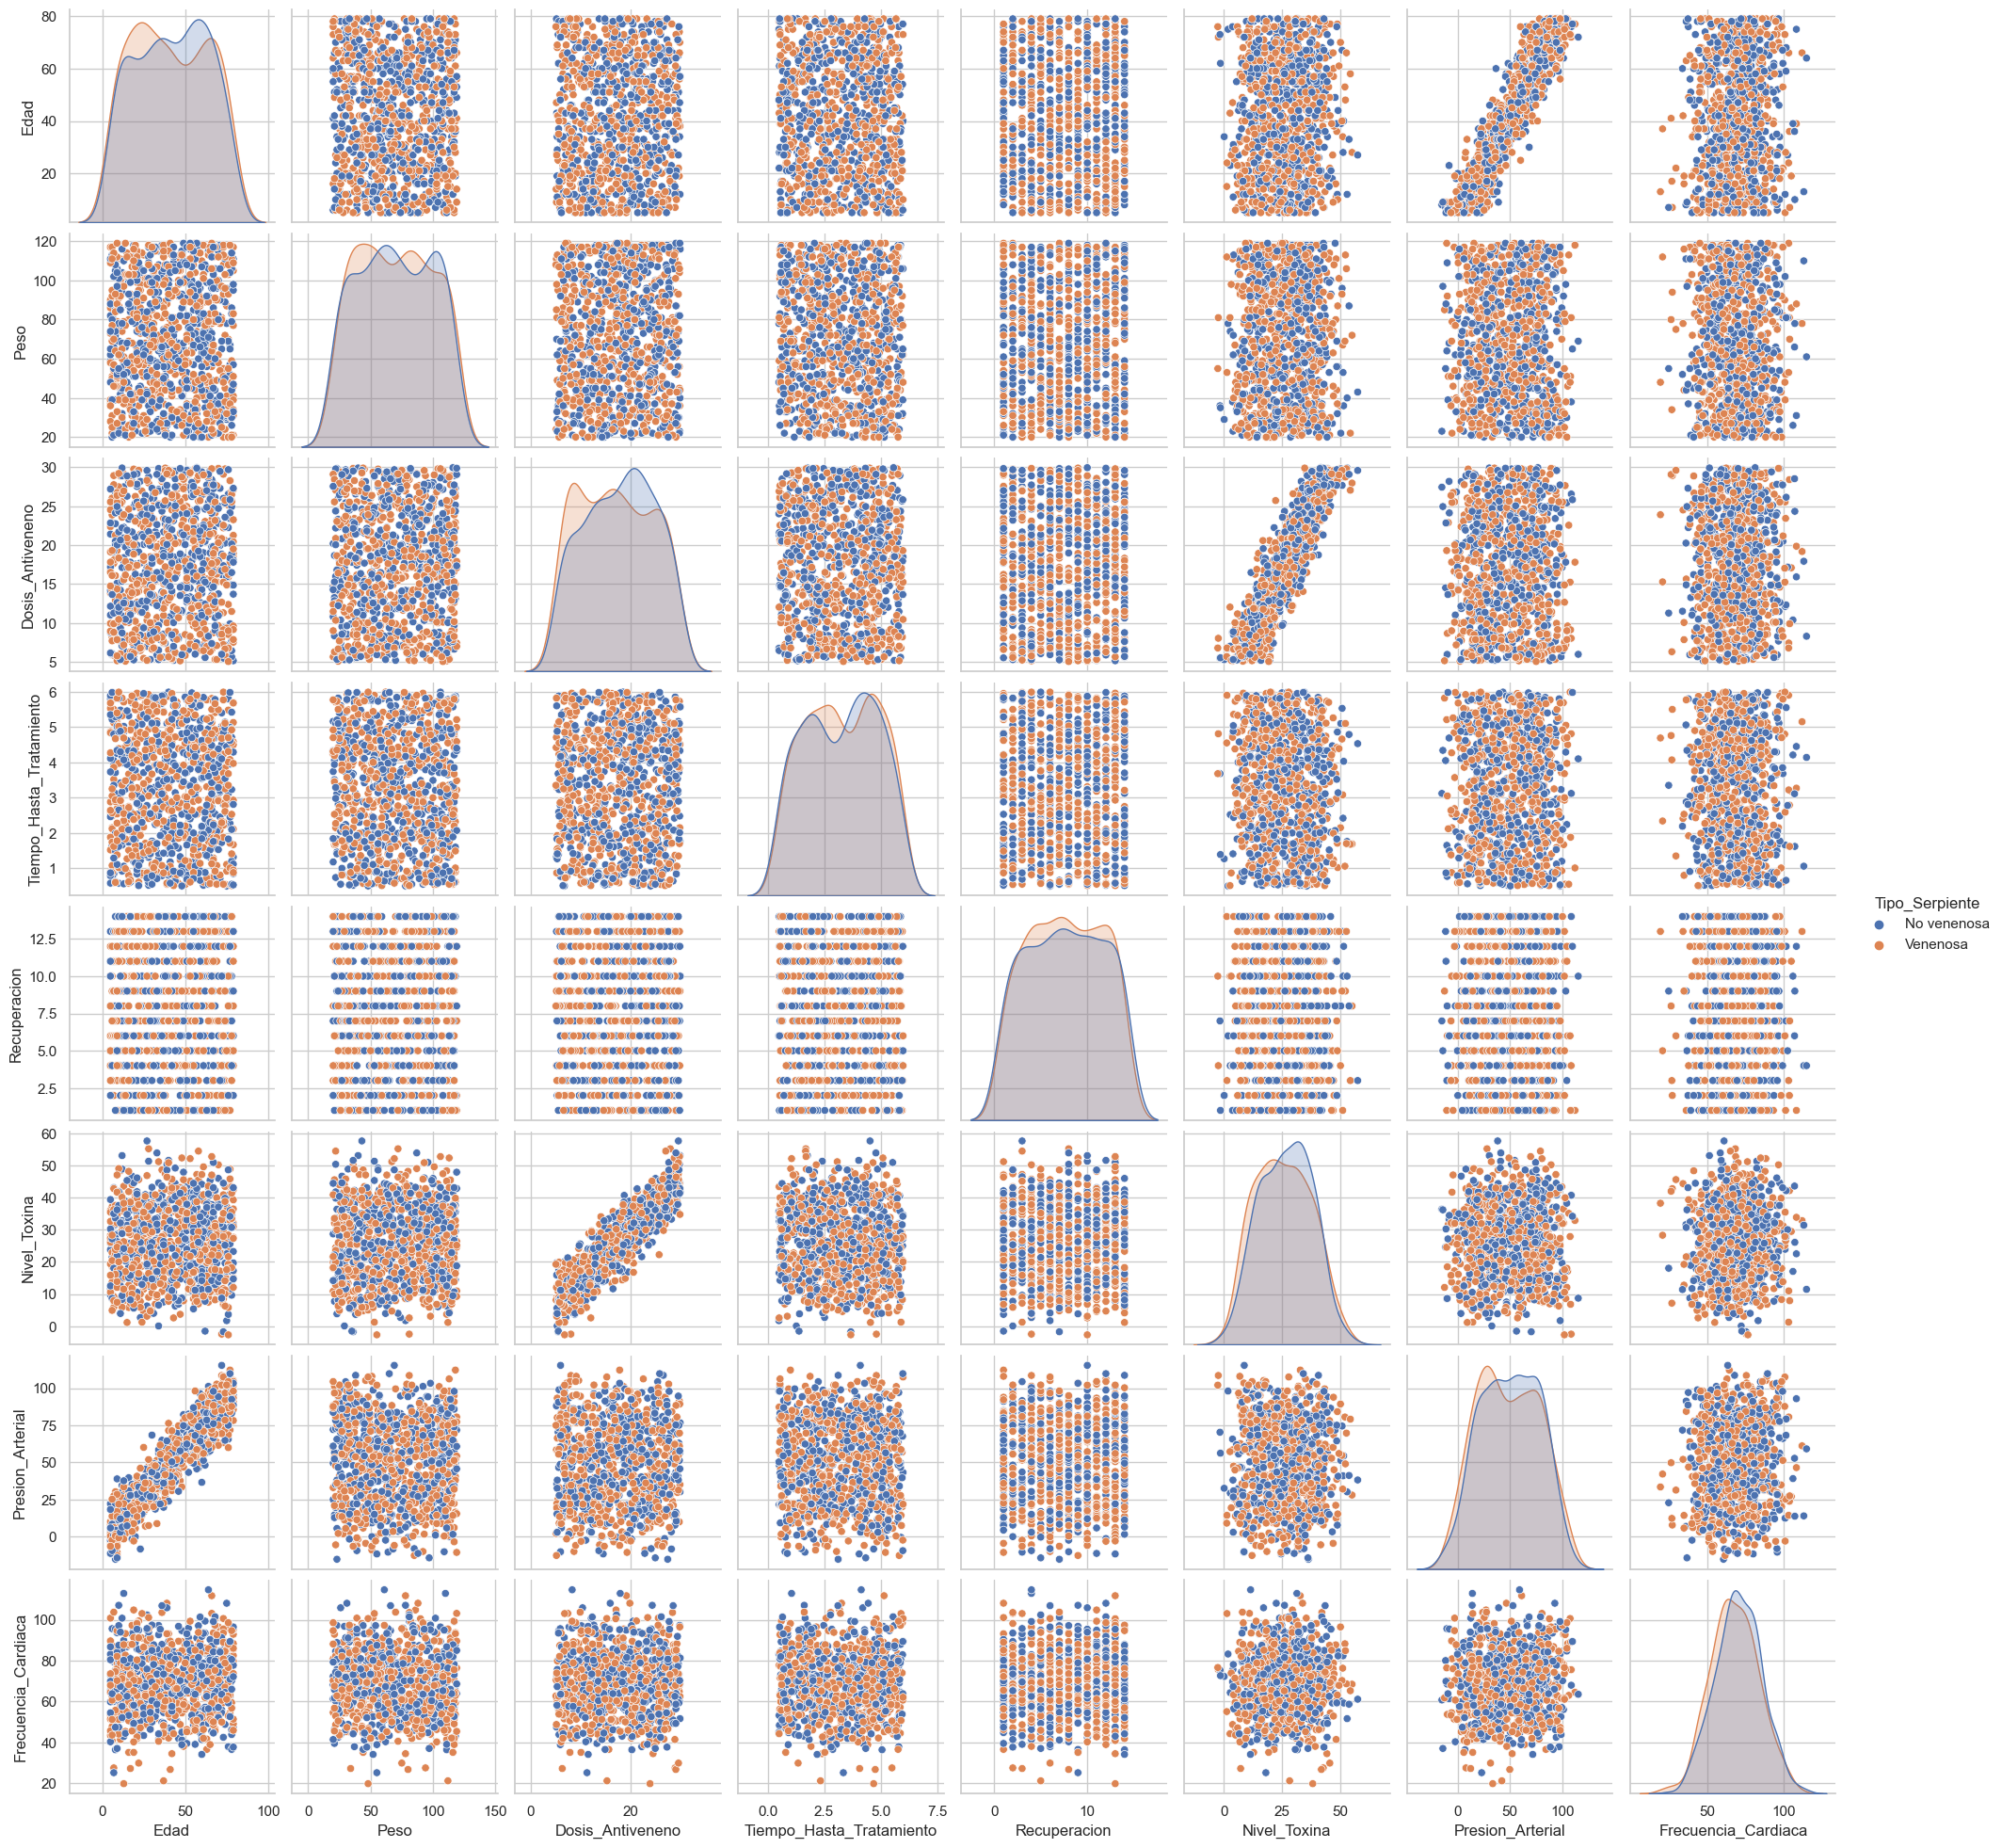

In [152]:
# Selecciona todas las columnas numéricas
numeric_columns = data_extended.select_dtypes(include=np.number).columns.tolist()

# Añade la columna 'Tipo_Serpiente' a la lista de columnas a seleccionar
columns_to_include = numeric_columns + ['Tipo_Serpiente']

# Crea un nuevo DataFrame con solo las columnas seleccionadas
data_for_pairplot = data_extended[columns_to_include]

# Ahora, realiza el pairplot con hue='Tipo_Serpiente'
sns.pairplot(data=data_for_pairplot, hue='Tipo_Serpiente')



# Mapas de Calor para Correlaciones

Text(0.5, 1.0, 'Mapa de Calor de Correlaciones')

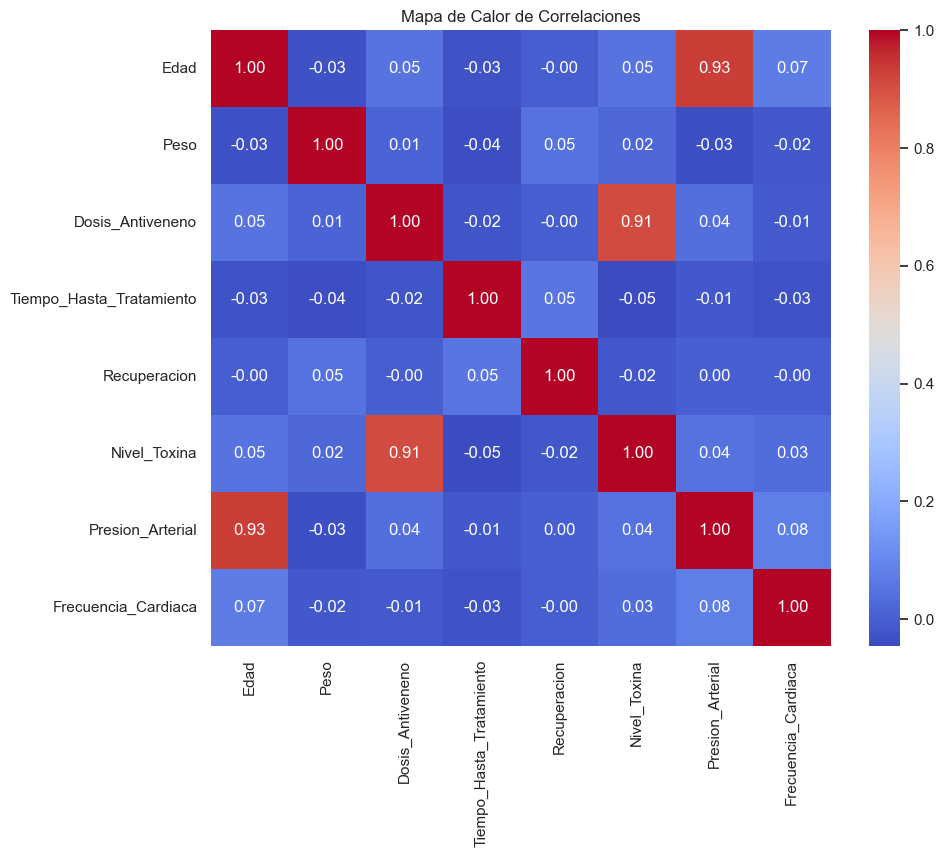

In [153]:
corr = data_extended.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Mapa de Calor de Correlaciones')


# Gráficos Interactivos con Plotly

In [154]:
#!pip3 install plotly
import plotly.express as px

fig = px.scatter(data_extended, x='Edad', y='Presion_Arterial', color='Tipo_Serpiente', hover_data=['Peso'])
fig.show()


# Gráficos de Líneas con Intervalos de Confianza

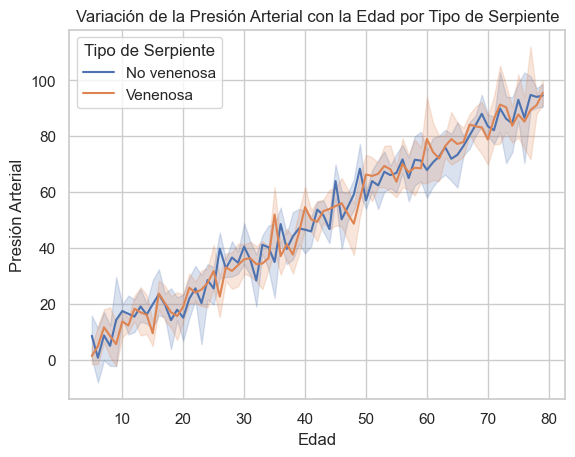

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajusta el gráfico de línea para usar 'Edad' en lugar de 'Tiempo'
sns.lineplot(data=data_extended, x='Edad', y='Presion_Arterial', hue='Tipo_Serpiente', errorbar='ci')

# Añadir títulos y etiquetas para mejorar la interpretación
plt.title('Variación de la Presión Arterial con la Edad por Tipo de Serpiente')
plt.xlabel('Edad')
plt.ylabel('Presión Arterial')
plt.legend(title='Tipo de Serpiente')
plt.show()


# Gráficos Facetados

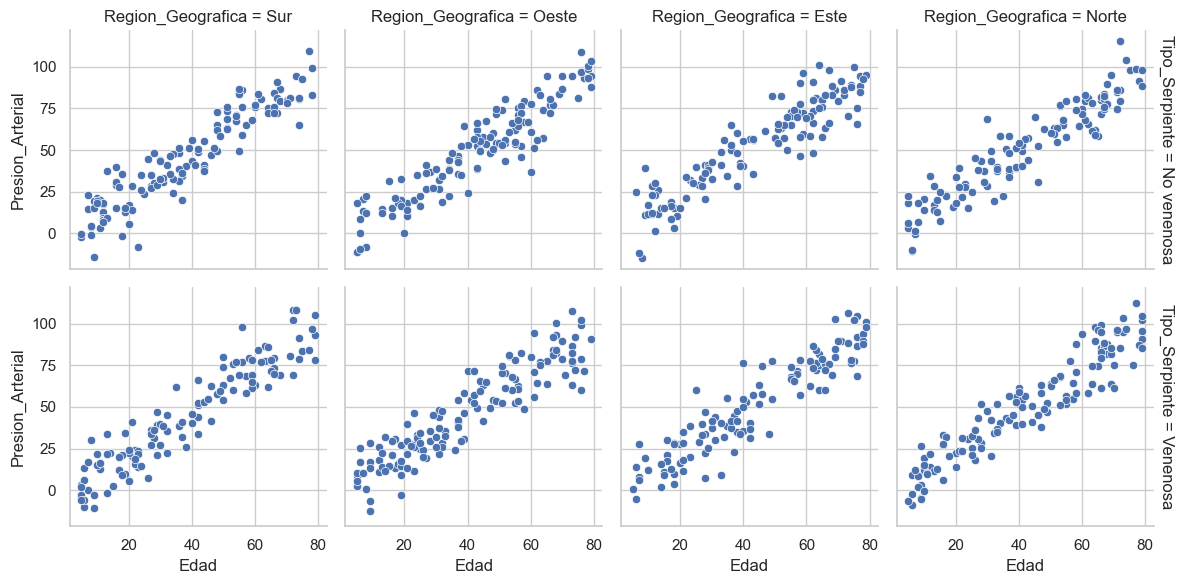

In [156]:
g = sns.FacetGrid(data_extended, col='Region_Geografica', row='Tipo_Serpiente', margin_titles=True)
g.map(sns.scatterplot, 'Edad', 'Presion_Arterial')


# Regresion lineal
### Paso 1: Selección de Variables

Vamos a suponer que estamos interesados en predecir la Presion_Arterial basándonos en Edad, Peso y Nivel_Toxina. Así, Presion_Arterial será nuestra variable dependiente y Edad, Peso, Nivel_Toxina serán las independientes.

### Paso 2: Comprobación de Supuestos

Los principales supuestos en la regresión lineal incluyen:

1. Linealidad: La relación entre la variable dependiente y las independientes debe ser lineal.
2. Independencia de los Residuos: Los residuos (errores) del modelo deben ser independientes entre sí.
3. Homocedasticidad: La varianza de los errores debe ser constante para todas las predicciones.
4. Normalidad de los Residuos: Los residuos deben distribuirse normalmente.

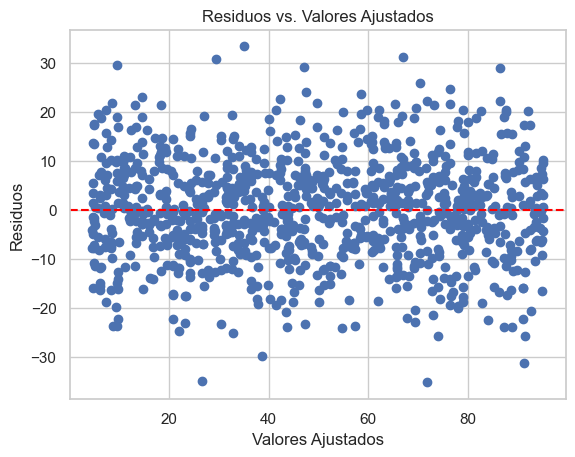

{'Valor de la Estadística de Lagrange': 4.472174109886873, 'P-valor de Lagrange': 0.21478576291817372, 'Valor de la Estadística F': 1.491431746927714, 'P-valor F': 0.21529661698121969}


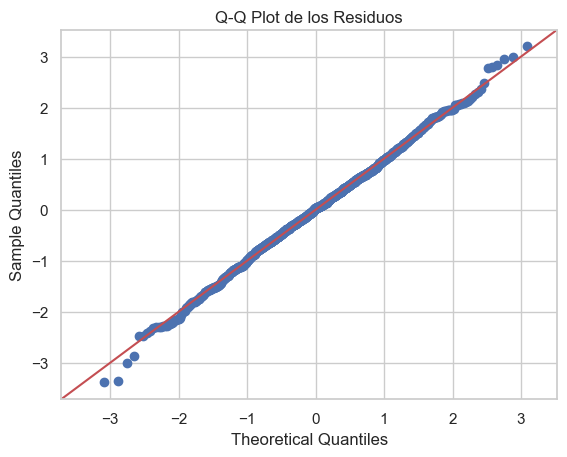

Test de Shapiro-Wilk: Estadístico=0.998629093170166, P-valor=0.6406874060630798
Estadístico de Durbin-Watson: 2.077956121382042 (Valores cercanos a 2 indican independencia)


In [157]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan

# Seleccionar variables independientes y dependiente
X = data_extended[['Edad', 'Peso', 'Nivel_Toxina']]
y = data_extended['Presion_Arterial']

# Añadir una constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Calcular residuos
residuos = modelo.resid

# Comprobación Homocedasticidad
# Gráfico de residuos vs. valores ajustados
valores_ajustados = modelo.fittedvalues
plt.scatter(valores_ajustados, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, modelo.model.exog)

# Imprimir los resultados
nombres = ['Valor de la Estadística de Lagrange', 'P-valor de Lagrange', 'Valor de la Estadística F', 'P-valor F']
print(dict(zip(nombres, bp_test)))

# Comprobación de la Normalidad de los Residuos
# Q-Q plot de los residuos
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q Plot de los Residuos')
plt.show()

# Test de Shapiro-Wilk para la normalidad
shapiro_test = stats.shapiro(residuos)
print(f"Test de Shapiro-Wilk: Estadístico={shapiro_test[0]}, P-valor={shapiro_test[1]}")

# Comprobación de la Independencia de los Residuos
# Test de Durbin-Watson
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuos)
print(f"Estadístico de Durbin-Watson: {durbin_watson_stat} (Valores cercanos a 2 indican independencia)")


1. Selección de Variables: Escogemos Edad, Peso y Nivel_Toxina como variables independientes y Presion_Arterial como dependiente.
2. Modelo de Regresión: Creamos y ajustamos el modelo utilizando OLS de statsmodels.
3. Homocedasticidad: Creamos un gráfico de dispersión de residuos vs. valores ajustados. Buscamos patrones; la ausencia de patrones sugiere linealidad y homocedasticidad.
4. Normalidad de los Residuos: Usamos un Q-Q plot para comparar la distribución de los residuos con una distribución normal. Realizamos además el test de Shapiro-Wilk.
5. Independencia de los Residuos: Aplicamos el test de Durbin-Watson; valores cercanos a 2 indican que no hay autocorrelación en los residuos.

### Paso 3: Construcción del Modelo

Vamos a construir el modelo usando statsmodels, una biblioteca que facilita la evaluación de los resultados estadísticos.

In [158]:
import statsmodels.api as sm

# Seleccionar variables independientes y dependiente
X = data_extended[['Edad', 'Peso', 'Nivel_Toxina']]
y = data_extended['Presion_Arterial']

# Añadir una constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

### Paso 4: Evaluación del Modelo

In [159]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:       Presion_Arterial   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2164.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:06   Log-Likelihood:                -3761.9
No. Observations:                1000   AIC:                             7532.
Df Residuals:                     996   BIC:                             7551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8009      1.272     -0.630   

# Regresion Logistica

Supongamos que queremos predecir la probabilidad de que un antiveneno sea efectivo (Efectividad_Antiveneno) basándonos en Edad, Peso y Nivel_Toxina.

### Paso 1: Preparar los Datos

Primero, necesitamos asegurarnos de que la variable dependiente esté codificada como 0 y 1. Supongamos que Efectividad_Antiveneno ya está codificada de esta manera, donde 1 representa "Efectivo" y 0 "No efectivo".

In [160]:
import pandas as pd
import statsmodels.api as sm


# Suponiendo que 'Efectividad_Antiveneno' ya está codificada correctamente, seleccionamos las variables
X = data_extended[['Edad', 'Peso', 'Nivel_Toxina']]  # Variables independientes
y = data_extended['Efectividad_Antiveneno']  # Variable dependiente

# Codificar la variable dependiente como 0 y 1
y = y.map({'No efectivo': 0, 'Efectivo': 1})

# Verifica que la codificación se haya realizado correctamente
print(y.head())



0    0
1    0
2    0
3    0
4    0
Name: Efectividad_Antiveneno, dtype: int64


### Paso 2: Añadir una Constante

Para la regresión logística en statsmodels, necesitamos añadir manualmente una columna constante a nuestras variables independientes para representar el intercepto.

In [161]:
X = sm.add_constant(X)

### Paso 3: Ajustar el Modelo de Regresión Logística

Utilizaremos Logit de statsmodels para ajustar el modelo de regresión logística.

In [162]:
modelo_logistico = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.198453
         Iterations 8


### Paso 4: Revisar el Resumen del Modelo

El resumen proporciona información útil sobre la relación entre las variables independientes y la probabilidad de que el antiveneno sea efectivo.

In [163]:
print(modelo_logistico.summary())

                             Logit Regression Results                             
Dep. Variable:     Efectividad_Antiveneno   No. Observations:                 1000
Model:                              Logit   Df Residuals:                      996
Method:                               MLE   Df Model:                            3
Date:                    Wed, 03 Apr 2024   Pseudo R-squ.:                  0.1749
Time:                            21:56:06   Log-Likelihood:                -198.45
converged:                           True   LL-Null:                       -240.51
Covariance Type:                nonrobust   LLR p-value:                 4.025e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3121      0.745     -9.811      0.000      -8.773      -5.851
Edad             0.0018      0.006      0.279      0.780      -0.011       0.014
Peso        

#### Explicación del Resumen del Modelo:

1. Coeficientes (coef): Indican la dirección y la magnitud de la relación entre cada predictor y el logaritmo de las probabilidades del evento (log-odds). Un coeficiente positivo indica que un aumento en esa variable está asociado con un aumento en la probabilidad del evento.
2. P-valores: Ayudan a determinar la significancia estadística de cada coeficiente. Un p-valor bajo (p. ej., < 0.05) sugiere que la variable correspondiente es un predictor significativo del evento.
3. Estadísticas de Ajuste: Incluyen el pseudo R-cuadrado, que proporciona una noción de cuánta variabilidad en la respuesta se explica por el modelo (aunque su interpretación difiere del R-cuadrado en la regresión lineal).

### Paso 5: Interpretar los Coeficientes

Para interpretar los coeficientes de la regresión logística, es útil convertirlos de log-odds a odds multiplicándolos por ee (la base del logaritmo natural).

In [164]:
# Obtener los odds ratios de los coeficientes
odds_ratios = np.exp(modelo_logistico.params)

# Obtener los intervalos de confianza de los coeficientes
conf = modelo_logistico.conf_int()

# Transformar los intervalos de confianza a odds ratios
conf_odds_ratios = np.exp(conf)

# Crear un DataFrame para una mejor visualización
odds_df = pd.DataFrame({'Odds Ratio': odds_ratios, 'CI 2.5%': conf_odds_ratios[0], 'CI 97.5%': conf_odds_ratios[1]})

odds_df

Odds Ratio   CI 2.5%  CI 97.5%
const           0.000667  0.000155  0.002876
Edad            1.001806  0.989206  1.014567
Peso            1.012873  1.003320  1.022517
Nivel_Toxina    1.120049  1.087967  1.153078

# Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica estadística que permite reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad posible de variación en los datos. Esto se logra transformando las variables originales en un nuevo conjunto de variables, las componentes principales, que son ortogonales (no correlacionadas) entre sí. Vamos a realizar un PCA paso a paso:

### Paso 1: Preparar los Datos

Para PCA, es crucial estandarizar los datos debido a que PCA es sensible a las escalas de las variables.

In [165]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'data_extended' es tu DataFrame y has seleccionado algunas variables cuantitativas para PCA
variables = ['Edad', 'Peso', 'Nivel_Toxina', 'Presion_Arterial', 'Frecuencia_Cardiaca']
X = data_extended[variables]

# Estandarizar las características
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


### Paso 2: Aplicar PCA

Utilizaremos PCA de sklearn.decomposition para llevar a cabo el análisis.

In [166]:
from sklearn.decomposition import PCA

# Instanciar PCA
pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X_std)


### Paso 3: Inspeccionar los Resultados

Después de ajustar PCA, podemos examinar varias propiedades del resultado.

* Proporción de Varianza Explicada: Muestra cuánta variabilidad de los datos originales es capturada por cada componente principal.

In [167]:
print(pca.explained_variance_ratio_)

[0.39001841 0.20538566 0.20048384 0.19034941 0.01376268]


* Gráfico de Scree: Nos ayuda a decidir cuántas componentes principales conservar.

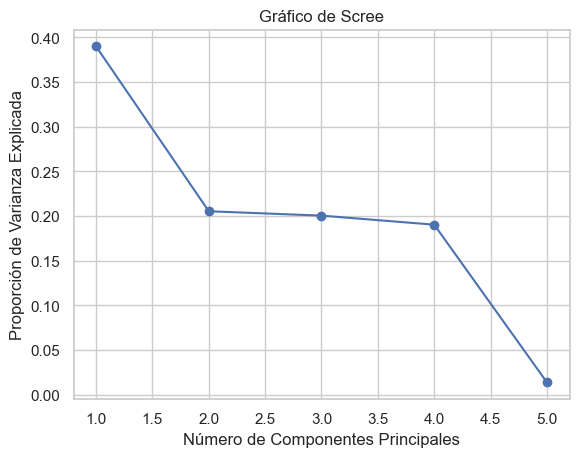

In [168]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Gráfico de Scree')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.show()


* Cargas o Pesos de las Componentes Principales: Muestran cómo cada variable original contribuye a las componentes principales.

In [169]:
print(pca.components_)

[[ 6.99686576e-01 -4.79677207e-02  7.22473750e-02  7.00214849e-01
   1.12326641e-01]
 [-4.46061082e-02  5.72510861e-01  7.45611835e-01 -4.68516509e-02
   3.34827603e-01]
 [ 9.41681519e-02  6.48640661e-01 -1.57601184e-01  8.43117110e-02
  -7.33792242e-01]
 [-3.61515488e-04  4.99188555e-01 -6.43421140e-01  7.85365147e-03
   5.80308723e-01]
 [ 7.06810596e-01 -2.54803229e-03 -3.79630805e-03 -7.07342875e-01
   7.99586653e-03]]


### Paso 4: Elegir el Número de Componentes

El criterio más común es conservar las componentes hasta donde se observa un 'codo' en el gráfico de Scree, o seleccionar un número que capture una alta proporción de la varianza total (p. ej., 80-90%).

In [170]:
# Si decidimos conservar solo las primeras 2 componentes, por ejemplo
pca_reducido = PCA(n_components=2)
X_pca_reducido = pca_reducido.fit_transform(X_std)


### Paso 5: Interpretación

* Cada componente principal es una combinación lineal de las variables originales.
* Las cargas indican la importancia de cada variable en cada componente principal.
* Los scores (los valores transformados) se pueden usar para visualizaciones o como entradas para otros análisis.

### Paso 6: Visualización de los Resultados de PCA

Supongamos que decidimos conservar las dos primeras componentes principales. Podemos visualizar cómo los datos proyectados en estas dos componentes se distribuyen y si podemos observar alguna agrupación o patrón, especialmente si coloreamos los puntos según alguna variable de interés (como la 'Efectividad_Antiveneno' en tu caso).

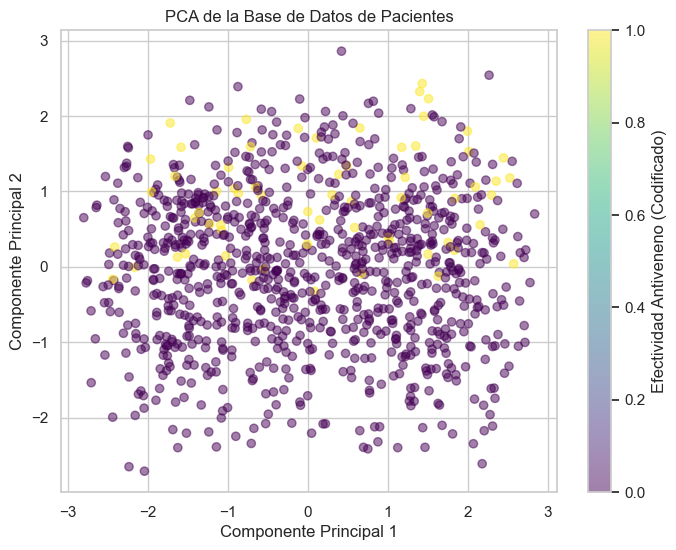

In [171]:
plt.figure(figsize=(8, 6))

# Codificar 'Efectividad_Antiveneno' a valores numéricos si aún no está hecho
data_extended['Efectividad_Antiveneno_Codificada'] = data_extended['Efectividad_Antiveneno'].map({'No efectivo': 0, 'Efectivo': 1})

# y que 'X_pca_reducido' contiene las dos primeras componentes principales de los datos
plt.scatter(X_pca_reducido[:, 0], X_pca_reducido[:, 1], c=data_extended['Efectividad_Antiveneno_Codificada'], cmap='viridis', alpha=0.5)

plt.title('PCA de la Base de Datos de Pacientes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Efectividad Antiveneno (Codificado)')
plt.grid(True)
plt.show()

En este gráfico, cada punto representa una observación en el espacio de las dos primeras componentes principales, y el color indica la efectividad del antiveneno. Este tipo de visualización puede ayudar a identificar si hay patrones o agrupaciones relacionadas con la efectividad del antiveneno.

#### Varianza Explicada

Es útil conocer cuánta varianza de los datos originales se explica con las componentes principales seleccionadas. Esto nos da una idea de cuánta información se ha preservado y cuánta se ha perdido.

In [172]:
# Mostrar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente: ", pca_reducido.explained_variance_ratio_)

# Calcular la varianza total explicada
varianza_total_explicada = sum(pca_reducido.explained_variance_ratio_)
print("Varianza total explicada: ", varianza_total_explicada)


Varianza explicada por cada componente:  [0.39001841 0.20538566]
Varianza total explicada:  0.5954040699273473


La varianza explicada por cada componente te dice cuánto contribuye cada una a capturar la estructura de los datos. La suma de la varianza explicada por las componentes seleccionadas te da una medida de cuánta información de los datos originales se conserva en la proyección PCA.

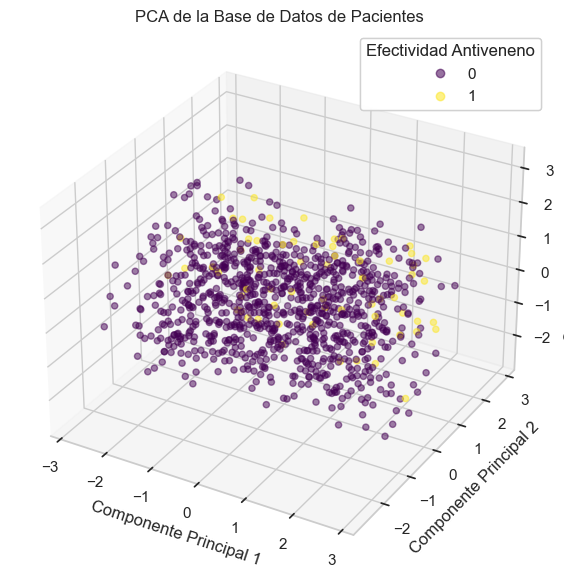

In [173]:
from mpl_toolkits.mplot3d import Axes3D

# Asegúrate de que el PCA se haya realizado con al menos 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_std)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Cambia 'Efectividad_Antiveneno_Codificada' por el nombre correcto de tu columna si es diferente
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=data_extended['Efectividad_Antiveneno_Codificada'], cmap='viridis', alpha=0.5)

ax.set_title('PCA de la Base de Datos de Pacientes')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Efectividad Antiveneno")
ax.add_artist(legend1)

plt.show()
